In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   
#import matplotlib.animation as animation
#%matplotlib notebook

# Input values

In [2]:
C = 65
g = 10
L = 1000000
teind = 100 * 3600

M = 40                                         #[-]                #space resolution
N = 20000                                       #[-]                #time resolution

d1 = 5
d2 = 5

h10 = 0
h20 = 0

u10 = 0
u20 = 0

A = 1
w = 1.4E-4

k0 = 8E-4
k1 = 7E-4
k2 = g/(C**2)

p1 = 1000
p2 = 1012


In [3]:
dx = L/M
dt = teind/N

x = np.arange(0,L,dx)
t = np.arange(0,teind,dt)

h1 = np.zeros((N,M))
h2 = np.zeros((N,M))
u1 = np.zeros((N,M))
u2 = np.zeros((N,M))

# initial conditions

In [4]:
h1[0,] = h10
h2[0,] = h20
h1[1,] = h10
h2[1,] = h20
u1[0,] = u10
u2[0,] = u20

In [14]:
h1[:,0] = h20   
h2[:,0] = h10
u1[:,M-1]=0
u2[:,M-1]=0

# Numerical computation

for n in range(1,round(N-1)):
    for m in range(0,round(M-1)):
        T1 = k1*p1*abs(u1[n,m]-u2[n,m])*(u1[n,m]-u2[n,m])
        T2 = k2*p2*abs(u2[n,m])*(u2[n,m])
        
        A1 = u1[n,m]*(u1[n,m+1]-u1[n,m-1])/(2*dx)
        A2 = u2[n,m]*(u2[n,m+1]-u2[n,m-1])/(2*dx)
        
        u1[n+1,m] = u1[n,m] - dt*(A1 + g*(d1+d2)*(h1[n,m+1]+h2[n,m+1]+h1[n,m]+h2[n,m])/dx  + T1/(p1*d1))
        u2[n+1,m] = u2[n,m] - dt*(A2+g*((p1/p2)*d1+d2)*((p1/p2)*h1[n,m+1]+h2[n,m+1]+(p1/p2)*h1[n,m]+h2[n,m])/dx+(T1-T2)/(p2*d2))
    for m in range(1,round(M-1)):
        h1[n+1,m] = h1[n,m] - dt * d1 * (u1[n,m] - u1[n,m-1])/dx
        h2[n+1,m] = h2[n,m] - dt * d1 * (u2[n,m] - u2[n,m-1])/dx
        


In [10]:
for n in range(1,round(N-1)):
    for m in range(0,round(M-1)):
        #T1 = k1*p1*abs(u1[n,m]-u2[n,m])*(u1[n,m]-u2[n,m])
        #T2 = k2*p2*abs(u2[n,m])*(u2[n,m])      
    
        A1 = u1[n,m]*(u1[n,m+1]-u1[n,m-1])/(2*dx)
        A2 = u2[n,m]*(u2[n,m+1]-u2[n,m-1])/(2*dx)
        
        u1[n+1,m] = u1[n,m] - dt*(A1+g*(h1[n,m+1]+h2[n,m+1]-h1[n,m]-h2[n,m])/dx )
        u2[n+1,m] = u2[n,m] - dt*(A2+g*((p1/p2)*h1[n,m+1]+h2[n,m+1]-(p1/p2)*h1[n,m]-h2[n,m])/dx)
    for m in range(1,round(M-1)):
        h1[n+1,m] = h1[n,m] - dt * d1 * (u1[n+1,m] - u1[n+1,m-1])/dx
        h2[n+1,m] = h2[n,m] - dt * d2 * (u2[n+1,m] - u2[n+1,m-1])/dx

import matplotlib.pyplot as plt
%matplotlib inline   

QQ=30
plt.plot(x,(d1 + d2 + h1[QQ,:]),x,(d2 + h2[QQ,:]))

In [7]:
import matplotlib.animation as animation
%matplotlib notebook

<IPython.core.display.Javascript object>


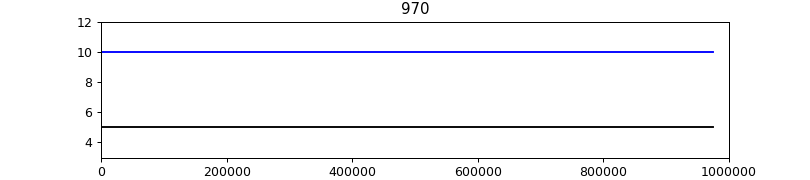

In [11]:
def update_line(i):
    tt = i*10
    plt.title(round(tt))
    pZ = d1+d2+h1[tt,:]
    line.set_data([x], [pZ])
    pB = d2+h2[tt,:]
    line2.set_data([x], [pB])

fig = plt.figure(figsize=(9,2))
ax = plt.subplot(111, xlim=(0,L), ylim=(3, 12))

line2, = plt.plot([], [], 'k')
line, = plt.plot([], [], 'b')

animation.FuncAnimation(fig, update_line, interval=dt)